In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Persistence Model for Forecasting**

Establishing a baseline is essential on any time series forecasting problem. A baseline in performance gives you an idea of how well all other models will actually perform on your problem.

**Forecast Performance Baseline**

A baseline in forecast performance provides a point of comparison. It is a point of reference for all other modeling techniques on your problem. If a model achieves performance at or below the baseline, the technique should be fixed or abandoned.

Three properties of a good technique for making a baseline forecast are:

- **Simple:** A method that requires little or no training or intelligence.
- **Fast:** A method that is fast to implement and computationally trivial to make a prediction.
- **Repeatable:** A method that is deterministic, meaning that it produces an expected output given the same input.

*A common algorithm used in establishing a baseline performance is the persistence algorithm.*

**Persistence Algorithm**

The persistence algorithm uses the value at the current time step (t) to predict the expected outcome at the next time step (t+1). This satisfies the three above conditions for a baseline forecast. To make this concrete, we will look at how to develop a persistence model and use it to establish a baseline performance for a simple univariate time series problem. First, let's review the Shampoo Sales dataset.

**Persistence Algorithm Steps**

1. Transform the univariate dataset into a supervised learning problem.
2. Establish the train and test datasets for the test harness.
3. Define the persistence model.
4. Make a forecast and establish a baseline performance.
5. Review the complete example and plot the output.

In [5]:
series = pd.read_csv("monthly-shampoo-sales.csv",squeeze=True, index_col=0,header=0,parse_dates=True)
series.head()

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales, dtype: float64

In [7]:
# Step 1: Define the Supervised Learning Problem
values = pd.DataFrame(series.values)
values.head()

,0
0,266.0
1,145.9
2,183.1
3,119.3
4,180.3


In [9]:
# Create lagged dataset
dataframe = pd.concat([values.shift(1),values], axis=1)
dataframe.columns = ["t","t+1"]
dataframe.head()

,t,t+1
0,NaN,266.0
1,266.0,145.9
2,145.9,183.1
3,183.1,119.3
4,119.3,180.3


From a supervised learning perspective, the t column is the input variable, or X, and the t+1 column is the output variable, or y.

*Step 2: Train and Test Sets*

The next step is to separate the dataset into train and test sets. We will keep the first 66% of the observations for training and the remaining 34% for evaluation. During the split, we are careful to exclude the first row of data with the NaN value. No training is required in this case; it's just habit. Each of the train and test sets are then split into the input and output variables.

In [11]:
# Step 2: Train and Test Sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train,test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

*Step 3: Persistence Algorithm*

We can define our persistence model as a function that returns the value provided as input. For example, if the t value of 266.0 was provided, then this is returned as the prediction, whereas the actual real or expected value happens to be 145.9

In [12]:
# Step 3: Persistence Algorithm
# persistence model

def model_persistence(x):
    return x 

*Step 4: Make and Evaluate Forecast*

We do this using the walk-forward validation method. No model training or retraining is required, so in essence, we step through the test dataset time step by time step and get predictions. Once predictions are made for each time step in the test dataset, they are compared to the expected values and a Root Mean Squared Error (RMSE) score is calculated.

In [14]:
# Step 4: Make and Evaluate Forecast

from sklearn.metrics import mean_squared_error
predictions = []
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

rmse = mean_squared_error(test_y,predictions,squared=False)
print(f"RMSE: {rmse}")

RMSE: 133.15599296140772


Text(0.5, 1.0, 'Train (blue), Test (green) and Predictions (red) plot, RMSE: 133.156')

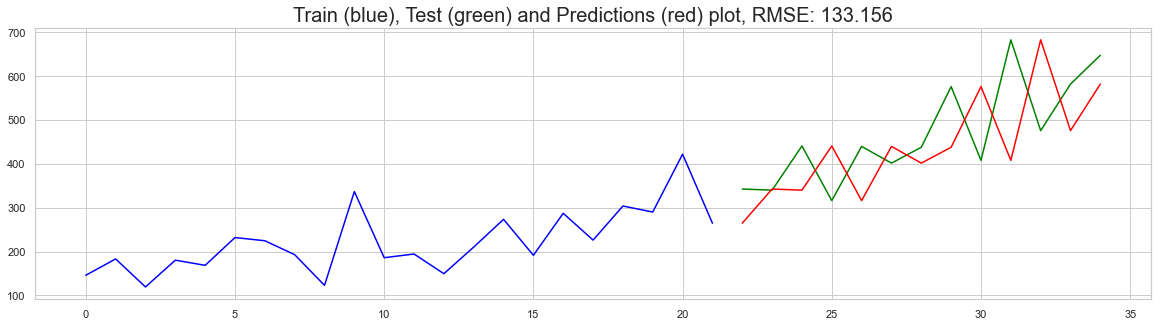

In [18]:
# Plotting the train, test and predictions 
test_plot_data = [None for i in train_y] + [x for x in test_y]
prediction_plot_data = [None for i in train_y] + [x for x in predictions]
fig,ax = plt.subplots(figsize=(20,5))
sns.set_theme(style='whitegrid')
sns.lineplot(data=train_y,color='blue')
sns.lineplot(data=test_plot_data,color="green")
sns.lineplot(data=prediction_plot_data, color='red')
ax.set_title(f"Train (blue), Test (green) and Predictions (red) plot, RMSE: {np.round(rmse,3)}",fontdict={'fontsize':20})

The persistence algorithm is naive. It is often called the naive forecast. It assumes nothing about the specifics of the time series problem to which it is applied. This is what makes it so easy to understand and so quick to implement and evaluate. As a machine learning practitioner, it can also spark a large number of improvements. Write them down. This is useful because these ideas can become input features in a feature engineering effort or simple models that may be combined in an ensembling effort later.